In [1]:
from Config import Config, plot_rewards, print_cfgs
from Env import env_agent_config, all_seed
from Utils import test, train, to_tensor, plot
from Agent import DoubleDQN
import d2l.torch as d2l
import torch

Hyperparameters:
        Name        	       Value        	        Type        
     algo_name      	     DoubleDQN      	   <class 'str'>    
      env_name      	    CartPole-v1     	   <class 'str'>    
        seed        	        1234        	   <class 'int'>    
     train_eps      	        600         	   <class 'int'>    
      test_eps      	         30         	   <class 'int'>    
     max_steps      	        200         	   <class 'int'>    
       gamma        	        0.99        	  <class 'float'>   
         lr         	       0.0005       	  <class 'float'>   
   epsilon_start    	        0.95        	  <class 'float'>   
    epsilon_end     	        0.05        	  <class 'float'>   
   epsilon_decay    	        500         	   <class 'int'>    
    buffer_size     	        1000        	   <class 'int'>    
     batch_size     	        128         	   <class 'int'>    
   target_update    	         4          	   <class 'int'>    
     hidden_dim     	        256      

/home/wyq/anaconda3/lib/python3.9/site-packages/gym/core.py:172: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed) instead.
  deprecation(


回合：10/600，奖励：10.00，Epislon：0.620
回合：20/600，奖励：11.00，Epislon：0.477
回合：30/600，奖励：15.00，Epislon：0.377
回合：40/600，奖励：10.00，Epislon：0.302
回合：50/600，奖励：17.00，Epislon：0.251
回合：60/600，奖励：10.00，Epislon：0.216
回合：70/600，奖励：10.00，Epislon：0.183
回合：80/600，奖励：11.00，Epislon：0.158
回合：90/600，奖励：12.00，Epislon：0.138
回合：100/600，奖励：11.00，Epislon：0.121
回合：110/600，奖励：10.00，Epislon：0.105
回合：120/600，奖励：11.00，Epislon：0.095
回合：130/600，奖励：13.00，Epislon：0.085
回合：140/600，奖励：11.00，Epislon：0.077
回合：150/600，奖励：9.00，Epislon：0.072
回合：160/600，奖励：12.00，Epislon：0.068
回合：170/600，奖励：9.00，Epislon：0.065
回合：180/600，奖励：12.00，Epislon：0.062
回合：190/600，奖励：16.00，Epislon：0.060
回合：200/600，奖励：11.00，Epislon：0.058
回合：210/600，奖励：10.00，Epislon：0.056
回合：220/600，奖励：9.00，Epislon：0.055
回合：230/600，奖励：11.00，Epislon：0.054
回合：240/600，奖励：10.00，Epislon：0.053
回合：250/600，奖励：33.00，Epislon：0.053
回合：260/600，奖励：10.00，Epislon：0.052
回合：270/600，奖励：9.00，Epislon：0.052
回合：280/600，奖励：10.00，Epislon：0.051
回合：290/600，奖励：12.00，Epislon：0.051
回合：300/600，奖励：12.00，Epislon

/home/wyq/anaconda3/lib/python3.9/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/home/wyq/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/home/wyq/Workspace/AttentionRL/StateAttentionDDQN/Config.py:43: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0, len(rewards), 10)  # 设置x轴的范围


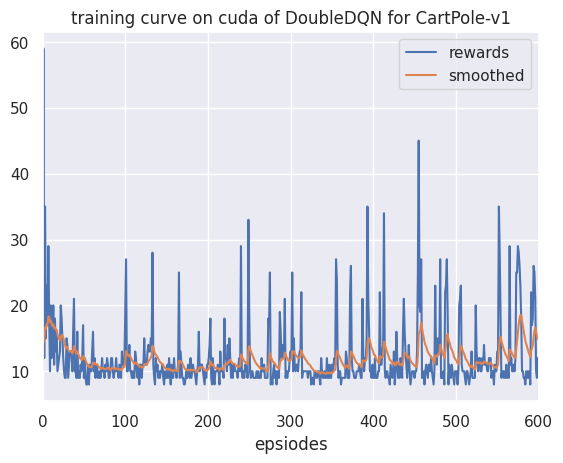

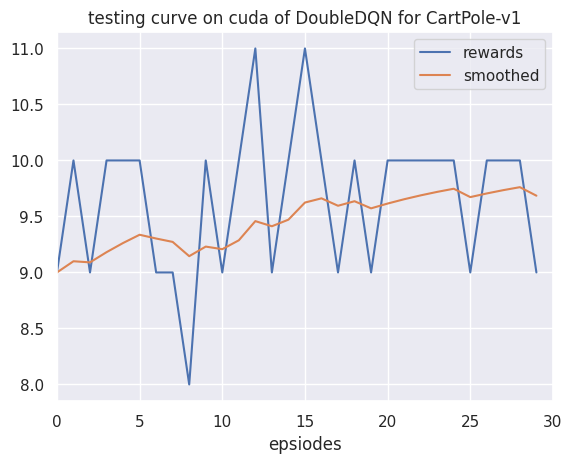

In [2]:
# 获取参数
cfg = Config() 
print_cfgs(cfg)
# 训练
env, agent = env_agent_config(cfg)
res_dic = train(cfg, env, agent)
 
plot_rewards(res_dic['rewards'], title=f"training curve on {cfg.device} of {cfg.algo_name} for {cfg.env_name}")  
# 测试
res_dic = test(cfg, env, agent)
plot_rewards(res_dic['rewards'], title=f"testing curve on {cfg.device} of {cfg.algo_name} for {cfg.env_name}")

In [3]:
from IPython import display
import matplotlib.pyplot as plt
# cfg = Config() 
# env, agent = env_agent_config(cfg)
# draw_agent = agent
draw_agent = agent
draw_agent.policy_net.eval()
NUM_OF_TEST = 1
test_total_reward = []
action_list = []
actions = []
state_list = []
atten_std = []
for i in range(NUM_OF_TEST):
    state = env.reset()
    total_reward = 0
    done = False

    # img = plt.imshow(env.render(mode='rgb_array'))
    while not done:
        action, q_value = draw_agent.predict_action_returnQ(state)
        actions.append(q_value)
        state, reward, done, _ = env.step(action)

        total_reward += reward
        # img.set_data(env.render(mode='rgb_array'))
        # display.display(plt.gcf())
        # display.clear_output(wait=True)

draw_agent.policy_net.train()
print("length of actions is ", len(actions))
for q_value in actions:
    print(q_value.cpu())

length of actions is  9
tensor([[14.2788, 14.1854]], grad_fn=<ToCopyBackward0>)
tensor([[9.6007, 9.3433]], grad_fn=<ToCopyBackward0>)
tensor([[7.9145, 7.5949]], grad_fn=<ToCopyBackward0>)
tensor([[6.6894, 6.3240]], grad_fn=<ToCopyBackward0>)
tensor([[5.7924, 5.3932]], grad_fn=<ToCopyBackward0>)
tensor([[4.8717, 4.4372]], grad_fn=<ToCopyBackward0>)
tensor([[3.7658, 3.2882]], grad_fn=<ToCopyBackward0>)
tensor([[2.7096, 2.1830]], grad_fn=<ToCopyBackward0>)
tensor([[1.8346, 1.2622]], grad_fn=<ToCopyBackward0>)


tensor([[[[4.5211e-13, 3.1567e-15, 3.6103e-10, 5.5318e-14, 1.8141e-18,
           8.2247e-14, 4.8426e-14, 1.7678e-01]]]], grad_fn=<ToCopyBackward0>)

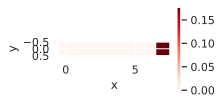

In [4]:
d2l.show_heatmaps(draw_agent.policy_net.atten.view(1, 1, 1, 8).cpu(), 'x', 'y')
draw_agent.policy_net.atten.view(1, 1, 1, 8).cpu()